In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline
# import functions from the modsim.py module
from modsim import *
#import 
import sympy

# Question


How long will it take for a white dwarf star to cool to a harvestable temperature?

# Background information

When average stars die 

# Model

## Constants
This is a system object which contains relevant mathmatical and physics related constants

In [2]:
"""Creates a system object which stores all of the relevant physics constants not specific to the situation being modeled
c is the speed of light
sigma is the Stefan–Boltzmann constant which describes radiative cooling
k is the Boltzmann constant (different from sigma) which describes the conversion of temperature to internal energy
avagadro is avagadro's constant which is representative of the number of particles in a mol
solarmass is the mass of our sun
carbon_mass_per_mol gives the mass of one mol of carbon in kg/mol
pi is the circle constant of mathmatics"""
constants = System(c = 3*10**(8),
                   sigma = 5.6703*10**(-8),
                   k = 1.380649*10**(-23), 
                   avagadro = 6.022140857*10**(23),
                   solar_mass = 1.98847*10**40,
                   solar_density = 1410,
                   carbon_mass_per_mol = 12.011 *10**(-3),
                   pi = 3.1415926535,
                   year = 31557600)

## Useful Functions

In [3]:
def surface_area(mass, density, constants):
    """this function calculates the surface area for a sphere of a given material and uniform composition
    mass is the mass of the sphere
    density is the duniform density of the material (kg/m^3)
    constants is a system object containing fundamental constants"""
    
    #calculates the volume of the material
    volume = mass/density
    
    #converts the volume to a sphere and finds the radius
    radius = (volume/(4/3)/constants.pi)**(1/3)
    
    #returns the surface area of the sphere
    return 4*constants.pi*(radius**2)

## State and System

In [4]:
"""this code creates a the state of the system
star_temp is the themperature of the star"""
#creates the state of the function
st8 = State(star_temp = 25000)

"""creates a system with innital values and constants
init is the innital state function
emmisivity is an innate property of the materials involved. White dwarfs emmit radiation in a near perfict manner which correlates to them having an emmisivity value of very close to 1
density is the density of the white dwarf in kg/m^3 and is found by multiplying the density of the sun (1410) times 92,000
c is the speed of light
sigma is the Stefan–Boltzmann constant which describes radiative cooling
k is the Boltzmann constant (different from sigma) which describes the conversion of temperature to internal energy
avagadro is avagadro's constant which is representative of the number of particles in a mol
solarmass is the mass of our sun
carbon_mass_per_mol gives the mass of one mol of carbon in kg/mol
pi is the circle constant of mathmatics
star_mass is the mass of the white dwarf which is 1.018* the mass of our sun
surf_area is the surface area of the star"""
sys = System(init = st8,
            emissivity  = 1,
            density = 92000*1410,
            c = 3*10**(8),
            sigma = 5.6703*10**(-8),
            k = 1.380649*10**(-23), 
            avagadro = 6.022140857*10**(23),
            solar_mass = 1.98847*10**40,
            solar_density = 1410,
            carbon_mass_per_mol = 12.011 *10**(-3),
            pi = 3.1415926535,
            year = 31557600,
            t_0 = 0,
            t_end = 31557600*10**15,
            env_temp = 2.7,
            star_mass = 1.018*1.98847*10**40,
            surf_area = 1.401707440331564e+22)

## update function

A differential equation for the temperature was derived from the change in energy formula for an object cooling via radiative cooling as described here: http://hyperphysics.phy-astr.gsu.edu/hbase/thermo/cootime.html

$ \frac{dE_{star}}{dtime}=\epsilon*\sigma*A_{surface}*(T_{star}^4 - T_{environmant}^4)$

This equation was combined with the expression of internal energy in terms of temperature for an einstein solid as described here: http://hyperphysics.phy-astr.gsu.edu/hbase/Therm/einsol.html#c1 This equation was used to convert internal energy to temperature because calculations involving a specific heat assume a specific heat which is independient of temperature. Due to the exotic nature of the matter studied and the extreme conditions involved, this assumption was infeasable and the einstein solid method was used instead (einstein solids assume that an object is made of n quantum harmonic oscillators whose movements constitute the internal energy of the object)

$E_{internal} = N_{particles}*k*T$

The number of particles was found by using standard molar conversions assuming that a white dwarf is constituted entirely of carbon

$N_{particles} = \frac{mass}{carbon_{\frac{mass}{mol}}}*N_{a}$

In [5]:
def slope_func(st8,time, sys):
    star_temp = st8
    #converts the differential equation for the temperature of the star into code the derivation of this equation os described above
    dstar_tempdt = -(sys.emissivity*sys.sigma*sys.surf_area*(star_temp**4 - sys.env_temp**4))/(((sys.star_mass/sys.carbon_mass_per_mol)*sys.avagadro)*sys.k)
    #updates the temperature
    return dstar_tempdt

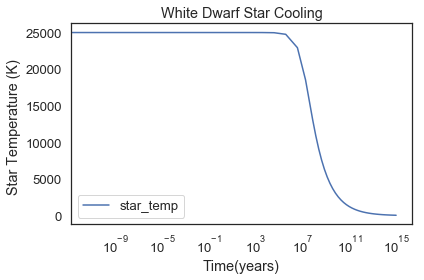

In [7]:
#runs the simulation with an ODE solver
results,details = run_ode_solver(sys,slope_func)

#Converts the time indexes from years into seconds
results.index /= sys.year

#plots the results
results.plot()

#decorates the plot and turns it tnto a semilog plot
decorate (xscale = "log", xlabel = "Time(years)", ylabel = "Star Temperature (K) ", title = "White Dwarf Star Cooling")

# Results

# Interperitation

# Abstract